# Predict the Heart Attack

About this dataset <br>

**Age** : Age of the patient

**Sex** : Sex of the patient

exang: exercise induced angina (1 = yes; 0 = no)

ca: number of major vessels (0-3)

cp : Chest Pain type chest pain type

Value 1: typical angina
Value 2: atypical angina
Value 3: non-anginal pain
Value 4: asymptomatic
trtbps : resting blood pressure (in mm Hg)

chol : cholestoral in mg/dl fetched via BMI sensor

fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

rest_ecg : resting electrocardiographic results

Value 0: normal
Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
thalach : maximum heart rate achieved

target : 0= less chance of heart attack 1= more chance of heart attack

## Library Imports

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter("ignore")

## Load the dataset and validate the data load

In [116]:
heart = pd.read_csv("resources/heart.csv")

heart.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [117]:
# Transform few attributes to categorical
heart['sex'] = pd.Categorical(heart['sex'])
heart['cp'] = pd.Categorical(heart['cp'])
heart['fbs'] = pd.Categorical(heart['fbs'])
heart['restecg'] = pd.Categorical(heart['restecg'])
heart['exng'] = pd.Categorical(heart['exng'])
heart['slp'] = pd.Categorical(heart['slp'])
heart['caa'] = pd.Categorical(heart['caa'])
heart['thall'] = pd.Categorical(heart['thall'])

In [118]:
# Check on the data structure
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       303 non-null    int64   
 1   sex       303 non-null    category
 2   cp        303 non-null    category
 3   trtbps    303 non-null    int64   
 4   chol      303 non-null    int64   
 5   fbs       303 non-null    category
 6   restecg   303 non-null    category
 7   thalachh  303 non-null    int64   
 8   exng      303 non-null    category
 9   oldpeak   303 non-null    float64 
 10  slp       303 non-null    category
 11  caa       303 non-null    category
 12  thall     303 non-null    category
 13  output    303 non-null    int64   
dtypes: category(8), float64(1), int64(5)
memory usage: 17.9 KB


In [119]:
# Check for missing values
heart.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

No missing values in any of the attributes

## Exploratory Data Analysis

1    165
0    138
Name: output, dtype: int64


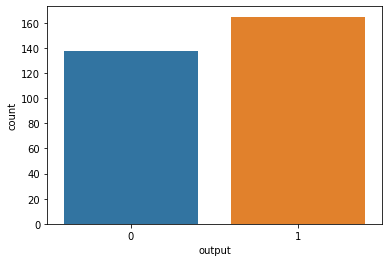

In [120]:
# Explore the response variable
print(heart['output'].value_counts())
sns.countplot(x='output', data=heart);

There is a good distribution of both types of data (higher chances of heart attack and lesser chances)

<AxesSubplot:xlabel='sex', ylabel='count'>

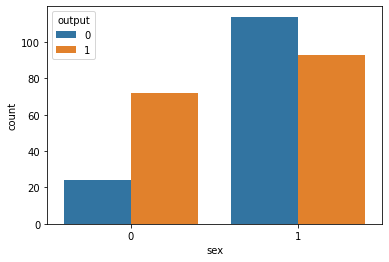

In [121]:
sns.countplot(x='sex', hue='output', data=heart)

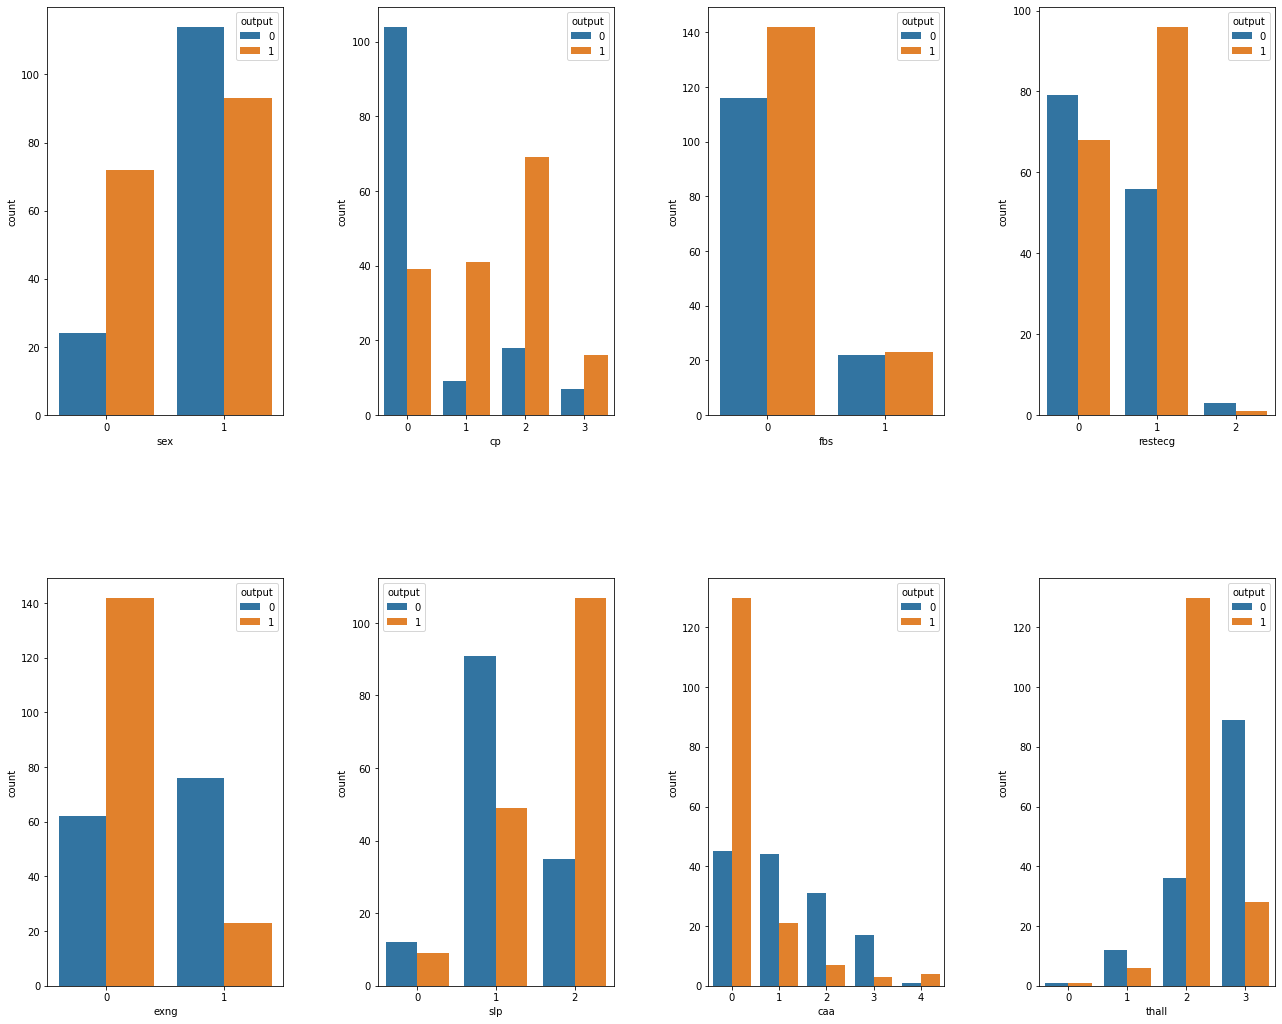

In [122]:
fig = plt.figure(figsize=(22, 18))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

ax = fig.add_subplot(2, 4, 1)
sns.countplot(x='sex', hue='output', data=heart, ax=ax)

ax = fig.add_subplot(2, 4, 2)
sns.countplot(x='cp', hue='output', data=heart, ax=ax)

ax = fig.add_subplot(2, 4, 3)
sns.countplot(x='fbs', hue='output', data=heart, ax=ax)

ax = fig.add_subplot(2, 4, 4)
sns.countplot(x='restecg', hue='output', data=heart, ax=ax)

ax = fig.add_subplot(2, 4, 5)
sns.countplot(x='exng', hue='output', data=heart, ax=ax)

ax = fig.add_subplot(2, 4, 6)
sns.countplot(x='slp', hue='output', data=heart, ax=ax)

ax = fig.add_subplot(2, 4, 7)
sns.countplot(x='caa', hue='output', data=heart, ax=ax)

ax = fig.add_subplot(2, 4, 8)
sns.countplot(x='thall', hue='output', data=heart, ax=ax)

plt.show()

Average Age by Output

output
0    56.601449
1    52.496970
Name: age, dtype: float64




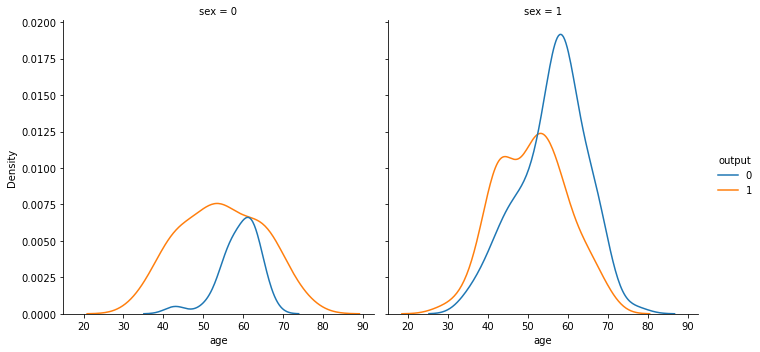

In [123]:
# Explore Age attribute by Sex with respect to Output

sns.displot(data=heart, x="age", hue="output", col="sex", kind="kde")

print("Average Age by Output\n")
print(heart.groupby("output")['age'].mean())
print("\n")

Average trtbps by Output

output
0    134.398551
1    129.303030
Name: trtbps, dtype: float64




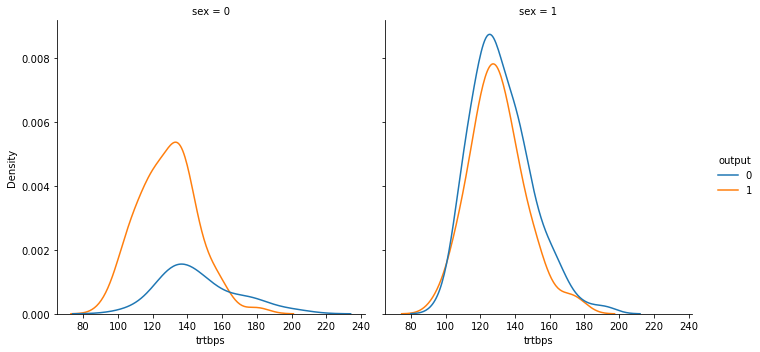

In [98]:
# Explore trtbps attribute by Sex with respect to Output

sns.displot(data=heart, x="trtbps", hue="output", col="sex", kind="kde")

print("Average trtbps by Output\n")
print(heart.groupby("output")['trtbps'].mean())
print("\n")

Average Cholesterol by Output

output
0    251.086957
1    242.230303
Name: chol, dtype: float64




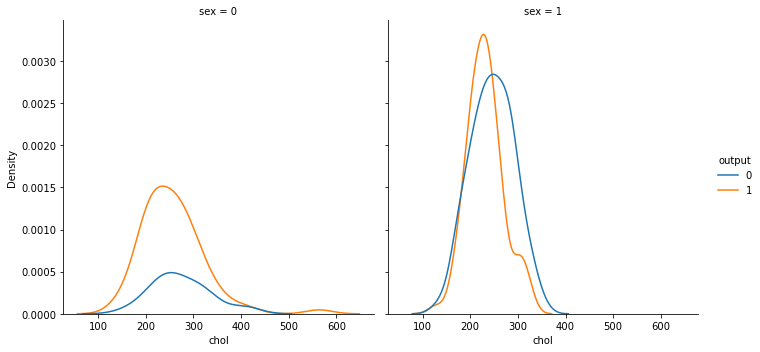

In [99]:
# Explore Chol attribute by Sex with respect to Output

sns.displot(data=heart, x="chol", hue="output", col="sex", kind="kde")

print("Average Cholesterol by Output\n")
print(heart.groupby("output")['chol'].mean())
print("\n")

Average thalachh by Output

output
0    139.101449
1    158.466667
Name: thalachh, dtype: float64




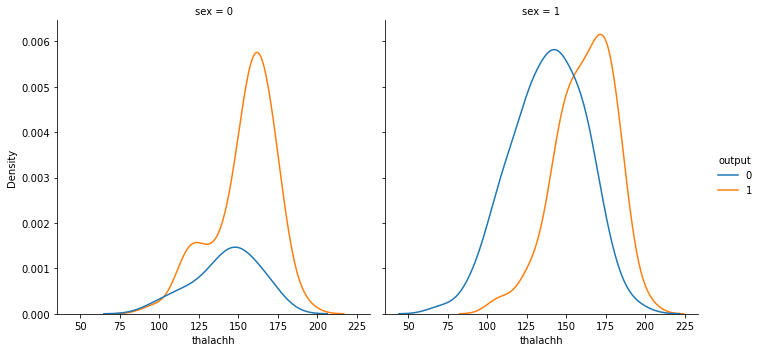

In [100]:
# Explore thalachh attribute by Sex with respect to Output

sns.displot(data=heart, x="thalachh", hue="output", col="sex", kind="kde")

print("Average thalachh by Output\n")
print(heart.groupby("output")['thalachh'].mean())
print("\n")

Average oldpeak by Output

output
0    1.585507
1    0.583030
Name: oldpeak, dtype: float64




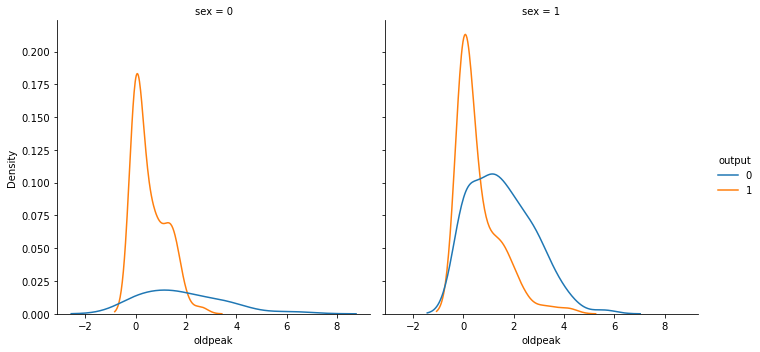

In [101]:
# Explore oldpeak attribute by Sex with respect to Output

sns.displot(data=heart, x="oldpeak", hue="output", col="sex", kind="kde")

print("Average oldpeak by Output\n")
print(heart.groupby("output")['oldpeak'].mean())
print("\n")

<AxesSubplot:>

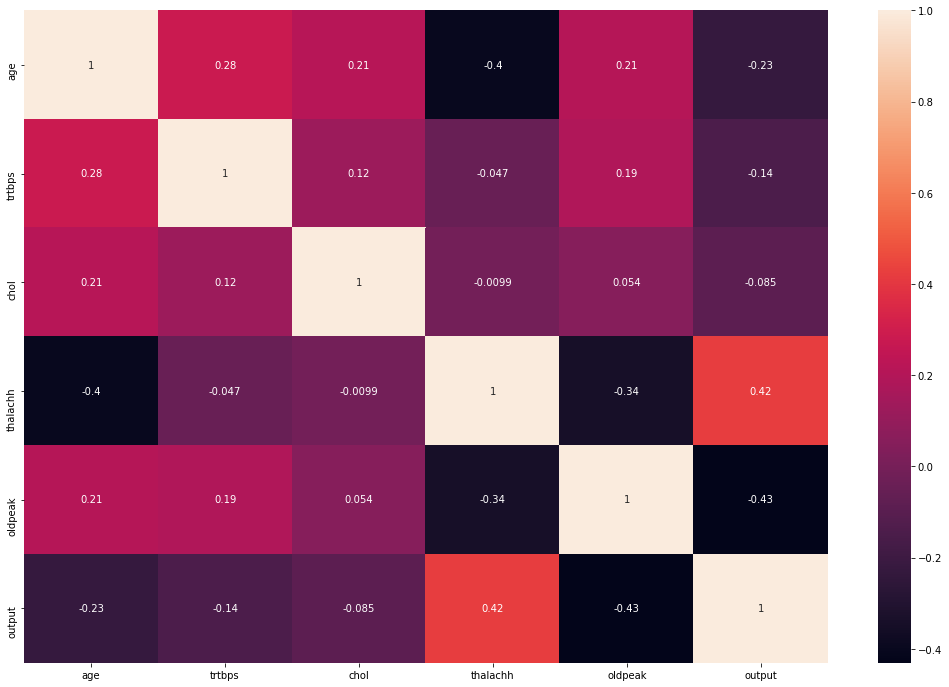

In [124]:
# Lets understand correlations
plt.figure(figsize=(18, 12))
sns.heatmap(heart.corr(), annot=True)

## Train-Test Split

In [125]:
from sklearn.model_selection import train_test_split

features = heart.drop(labels=['output'], axis=1)
target = heart['output']

features_train, features_test, target_train, target_test = train_test_split(features, 
                                                                            target, 
                                                                            test_size=0.3, random_state=101)

## Scaling the features

In [126]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
features_train_scaled = sc.fit_transform(features_train)
features_test_scaled = sc.transform(features_test)

## Random Forest Classification

In [127]:
# We will run the Random Forest Classifier on GridSearch for best hyperparameters

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier


param_grid = {'n_estimators': [50, 100, 200], 'max_features': ['auto', 'sqrt'], 'bootstrap': [True, False], 'criterion':['entropy', 'gini']}
rfcgrid = GridSearchCV(RandomForestClassifier(random_state=101), param_grid, verbose=100, cv=10, n_jobs=-2)
rfcgrid.fit(features_train, target_train)

Fitting 10 folds for each of 24 candidates, totalling 240 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=101),
             n_jobs=-2,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['entropy', 'gini'],
                         'max_features': ['auto', 'sqrt'],
                         'n_estimators': [50, 100, 200]},
             verbose=100)

In [128]:
# Checking the best params
rfcgrid.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_features': 'auto',
 'n_estimators': 50}

In [129]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score, accuracy_score

rfcpredictions = rfcgrid.predict(features_test)

print("Confusion Matrix - Random Forest")
print(confusion_matrix(target_test,rfcpredictions))
print("\n")
print("Accuracy Score - Random Forest")
print(accuracy_score(target_test, rfcpredictions))
print("\n")
print("F1 Score - Random Forest")
print(f1_score(target_test, rfcpredictions))
print("\n")
print("Classification Report - Random Forest")
print(classification_report(target_test,rfcpredictions))

Confusion Matrix - Random Forest
[[35  9]
 [ 7 40]]


Accuracy Score - Random Forest
0.8241758241758241


F1 Score - Random Forest
0.8333333333333334


Classification Report - Random Forest
              precision    recall  f1-score   support

           0       0.83      0.80      0.81        44
           1       0.82      0.85      0.83        47

    accuracy                           0.82        91
   macro avg       0.82      0.82      0.82        91
weighted avg       0.82      0.82      0.82        91



## Gradient Boosting Classifier

In [130]:
from sklearn.ensemble import GradientBoostingClassifier

param_grid = {'n_estimators':[100, 200, 300], 'loss' : ['deviance', 'exponential'], 'learning_rate':[0.001, 0.01, 0.1, 1, 10], 'criterion':['friedman_mse', 'mse', 'mae']}
grid = GridSearchCV(GradientBoostingClassifier(), param_grid, verbose=True, cv=10, n_jobs=-2)
grid.fit(features_train_scaled, target_train)

Fitting 10 folds for each of 90 candidates, totalling 900 fits


GridSearchCV(cv=10, estimator=GradientBoostingClassifier(), n_jobs=-2,
             param_grid={'criterion': ['friedman_mse', 'mse', 'mae'],
                         'learning_rate': [0.001, 0.01, 0.1, 1, 10],
                         'loss': ['deviance', 'exponential'],
                         'n_estimators': [100, 200, 300]},
             verbose=True)

In [131]:
# check the best params
grid.best_params_

{'criterion': 'friedman_mse',
 'learning_rate': 0.01,
 'loss': 'deviance',
 'n_estimators': 200}

In [132]:
grid_predictions = grid.predict(features_test_scaled)

print("Confusion Matrix - Gradient Boosting")
print(confusion_matrix(target_test,grid_predictions))
print("\n")
print("Accuracy Score - Gradient Boosting")
print(accuracy_score(target_test, grid_predictions))
print("\n")
print("F1 Score - Gradient Boosting")
print(f1_score(target_test, grid_predictions))
print("\n")
print("Classification Report - Gradient Boosting")
print(classification_report(target_test, grid_predictions)) 

Confusion Matrix - Gradient Boosting
[[33 11]
 [ 5 42]]


Accuracy Score - Gradient Boosting
0.8241758241758241


F1 Score - Gradient Boosting
0.8400000000000001


Classification Report - Gradient Boosting
              precision    recall  f1-score   support

           0       0.87      0.75      0.80        44
           1       0.79      0.89      0.84        47

    accuracy                           0.82        91
   macro avg       0.83      0.82      0.82        91
weighted avg       0.83      0.82      0.82        91



## Model - Logistic Regression

In [133]:
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression(solver='lbfgs')
logmodel.fit(features_train_scaled, target_train)

LogisticRegression()

In [134]:
predictions = logmodel.predict(features_test_scaled)

print("Confusion Matrix - Logistic Regression")
print(confusion_matrix(target_test,grid_predictions))
print("\n")
print("Accuracy Score - Logistic Regression")
print(accuracy_score(target_test, grid_predictions))
print("\n")
print("F1 Score - Logistic Regression")
print(f1_score(target_test, grid_predictions))
print("\n")
print("Classification Report - Logistic Regression")
print(classification_report(target_test, grid_predictions)) 

Confusion Matrix - Logistic Regression
[[33 11]
 [ 5 42]]


Accuracy Score - Logistic Regression
0.8241758241758241


F1 Score - Logistic Regression
0.8400000000000001


Classification Report - Logistic Regression
              precision    recall  f1-score   support

           0       0.87      0.75      0.80        44
           1       0.79      0.89      0.84        47

    accuracy                           0.82        91
   macro avg       0.83      0.82      0.82        91
weighted avg       0.83      0.82      0.82        91



## Model - SVM

In [135]:
from sklearn.svm import SVC

# We will define a list of param values in a grid and run SV classifier across various combinations

param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['linear', 'rbf', 'sigmoid', 'poly']}
svmgrid = GridSearchCV(SVC(), param_grid, verbose=100, cv=10, n_jobs=-2)
svmgrid.fit(features_train_scaled, target_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


GridSearchCV(cv=10, estimator=SVC(), n_jobs=-2,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'rbf', 'sigmoid', 'poly']},
             verbose=100)

In [136]:
# Check for best params
svmgrid.best_params_

{'C': 1, 'gamma': 1, 'kernel': 'linear'}

In [137]:
svm_predictions = svmgrid.predict(features_test_scaled)

print("Confusion Matrix - Support Vector Machines")
print(confusion_matrix(target_test, svm_predictions))
print("\n")
print("Accuracy Score - Support Vector Machines")
print(accuracy_score(target_test, svm_predictions))
print("\n")
print("F1 Score - Support Vector Machines")
print(f1_score(target_test, svm_predictions))
print("\n")
print("Classification Report - Support Vector Machines")
print(classification_report(target_test, svm_predictions))

Confusion Matrix - Support Vector Machines
[[36  8]
 [ 3 44]]


Accuracy Score - Support Vector Machines
0.8791208791208791


F1 Score - Support Vector Machines
0.8888888888888888


Classification Report - Support Vector Machines
              precision    recall  f1-score   support

           0       0.92      0.82      0.87        44
           1       0.85      0.94      0.89        47

    accuracy                           0.88        91
   macro avg       0.88      0.88      0.88        91
weighted avg       0.88      0.88      0.88        91

